<a href="https://colab.research.google.com/github/ncarolan/COS302/blob/main/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COS302 - HW7

In [9]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt

SEED = 12

npr.seed(SEED)
np.set_printoptions(precision=3, suppress=True)

## Problem 1

### (C)

Using an inverse function $F^{-1}(u): (0,1) → R = ln(\frac{u}{1-u})$:

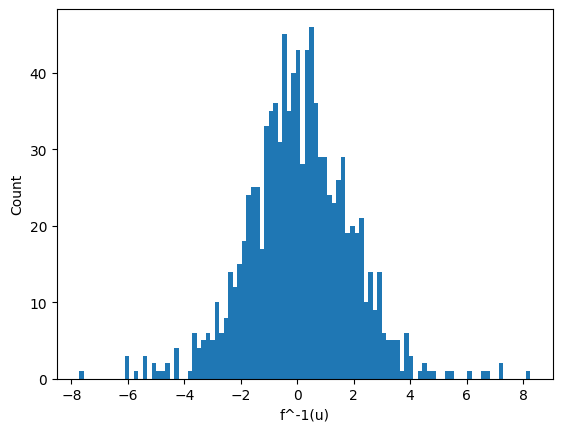

In [10]:
u = npr.rand(1000,)

f = np.log(u / (1-u))

plt.hist(f, bins=100); plt.xlabel("f^-1(u)"); plt.ylabel("Count"); plt.show()

## Problem 3

### (A)

In [11]:
x = npr.choice([-1, 1], size=(1_000_000,))

### (B)

In [12]:
y = np.where(x==-1, 0, npr.choice([-1,1], size=1_000_000))

### (C)

In [13]:
x_mean, y_mean = np.mean(x), np.mean(y)
manual_cov = 1 / (len(x)-1) * np.sum([(x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x))])

cov = np.cov(x,y, ddof=1)
assert abs(cov[0,1] - manual_cov) < 0.0001
print(f'Covariance: {cov[0,1]:.3f}')

Covariance: -0.001


## Problem 4

### (A)

Let's consider the two strategies.

#### Stay

If you stay, your probability of winning is simply the probability that your randomly selected cup/door/option is the winner, i.e. $1/3$.

#### Switch

If you play the switch strategy, there are two possibilities after you make your initial selection.
- $1/3$ of times, if you are already on correct cup. You will then switch to a losing cup.
- $2/3$ of times, you are initially on a losing cup. The operator then reveals the other losing cup. Because there are only three cups in total, the other unrevealing cup is the winning cup. You switch to the winning cup.

With 3 cups, the switch strategy wins $2/3$ of the time in expectation.

### (B)

In [15]:
def play(switch: bool = False, n: int = 3) -> bool:
  """
  Simulates the 'Monty Hall' problem with n choices.

  Args:
    switch (bool): Whether to switch after empty door is revealed
    n (int): Number of options ('doors') at start of game

  Returns:
    win (bool): Outcome
  """
  if n < 3:
    raise ValueError("n must be at least 3")

  doors = np.arange(n)
  correct = npr.randint(low=0, high=n)
  guess = npr.randint(low=0, high=n)

  # Select empty index to reveal
  reveal = npr.choice(doors[(doors != correct) & (doors != guess)])

  # If switching, randomly pick from remaining closed doors
  if switch:
      guess = npr.choice(doors[(doors != reveal) & (doors != guess)])

  return guess == correct

In [16]:
base_wins, switch_wins = 0, 0

for _ in range(1_000):
  base_wins += 1 if play(switch=False) else 0
  switch_wins += 1 if play(switch=True) else 0

print(f'Staying won {base_wins/10}% and switching won {switch_wins/10}%.')

Staying won 35.5% and switching won 68.1%.


### (C)

Let's reconsider the two strategies with N>3 cups.

#### Stay

If you stay, your probability of winning is simply the probability that your randomly selected cup/door/option is the winner, i.e. $1/N$.

#### Switch

If you play the switch strategy, there are two possibilities after you make your initial selection.
- $1/N$ of times, if you are already on correct cup. You will then switch to a losing cup.
- $(N-1)/N$ of times, you are initially on a losing cup. The operator then reveals one other losing cup. The winning cup is one of the remaining unrevealed cups. You randomly pick from the (N-2) unrevealed cups, excluding your initial pick.

With N cups, the switch strategy wins $\frac{N-1}{N (N-2)}$ of the time in expectation.

### (D)

In [18]:
for n in [5, 10, 25]:
  base_wins, switch_wins = 0, 0

  for _ in range(1_000):
    base_wins += 1 if play(switch=False, n=n) else 0
    switch_wins += 1 if play(switch=True, n=n) else 0

  ex = (n-1) / (n * (n-2))

  print(f'With {n} doors, staying won {base_wins/10}% and switching won {switch_wins/10}%. Expected {100/n}% and {(100 * ex):.2f}%.')

With 5 doors, staying won 19.7% and switching won 26.2%. Expected 20.0% and 26.67%.
With 10 doors, staying won 9.2% and switching won 12.4%. Expected 10.0% and 11.25%.
With 25 doors, staying won 2.9% and switching won 3.9%. Expected 4.0% and 4.17%.
